<a id='Introduction'></a>
## Introduction

*  Recursive Forward Elimination Workflow

**The workflow could prevent us from noise and redundancy of feature. Sometimes we just put all feature together but doesn't see what is actually happening. If we join one feature at once and test, a clear staged sum up comes. You'll see how this feature works. Is it good, bad, or others needed.** That's the idea of Recursive Foward Elimination Workflow. We'll try this for the in-sample training set, Out-Of-Bag validation set (a kind of CV), and the leader board.


* RandomForest

We'll show the pros and cons of RandomForest. Intro


* Sex-Pclass-table

Instead of checking your CV score, we suppose a target distribution which makes the passengers survived or dead and get close to it with our machine learning algorithm. That hypothesis supposed by Oscar Takeshita in his article [Divide and Conquer section 4.1](https://www.kaggle.com/pliptor/divide-and-conquer-0-82296), I think it pretty makes sense. If you wanna to conquer above 0.84, this kernel might show you some inspiration.

* If you are the pure beginners, check some EDA report and make your own model first, you'll check this kernel soonly.

Recommended:[Pytanic](https://www.kaggle.com/headsortails/pytanic) by Head or Tails, comprehensive content, take you a lot of time but worthy.


<a id='The Iterative Process'></a>
## The Iterative Process
There are a lot of kernels show you an approach with a streamlined style which is NOT TRUE! We always got stuck in our analysis, found out something might work, engineered it, made EDA of it, then try and failed finally. So it's a plenty of messy work on my jupyter book. This kernel will show you an iterative workflow which is more realistic. It basically follows this cycle:

* EDA --> Selected Features --> Modeling --> Estimated then back to EDA

In [4]:
# loading package
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix, classification_report
# loading data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_data = df_train.append(df_test)
# for display dataframe
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
# ignore warning
import warnings
warnings.filterwarnings("ignore")

<a id='Base Model'></a>
# Base Model
The base model is the lowest score we can get. Normally the coin tossing solution (just 0.5 probability survived or died). Here we start with Sex & Pclass only. 

<a id='Model Picking'></a>
## Model Picking

You need to pick 1~3 models and understand how it works. 
A different model needs different data preprocessing sometimes, and different performance on the feature weight also. So make sure what model you pick then we control some kind of variable. Search the tags model comparison and pick one. Here we pick RandomForest

In [5]:
# Convert Sex
df_data['Sex_Code'] = df_data['Sex'].map({'female' : 1, 'male' : 0}).astype('int')
# split training set the testing set
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]
# Inputs set and labels
X = df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y = df_train['Survived']

<a id='Feature Scaling'></a>
## Feature Scaling
Feature Scaling keeps our features weights the same in a distance-based model such as SVM, LogReg, LinearReg...etc. If you want to start with that. Then you needed.

On the other hand, the tree-based model works via the impurity function such as Decision Tree, Random Forest, Gradient Boosted Decision Tree...etc.
e.g. cut age feature at 14 makes two groups purer. then you don't need feature scaling.

<a id='RandomForest'></a>
## RandomForest
 Pros: 
* The large margin like boundary makes our solution more robust against the noise. 
* Efficient for both small and big dataset because we can train the decision
tree parallelly and mash them up.
* Self-validate by out-of-bag estimation( a kind of cross-validation) makes workflow simple.

Cons:

* Bagging and random-subspace decision tree ensemble so that we don't know how and why it predicts so.
* Performance depends on the random_state which might be unstable. we should check the stability by adding/dropping one tree.

<a id='Setting and Hyperparameters'></a>
## Setting and Hyperparameters
Be careful about you have set the random_state or not. The two reasons below:
* make your solution repeatable
* make your observation without the model variance

The min_sample_leaf, min_sample splits, max depth are all some kind of prevent your model from overfitting. 

Our goal is feature testing not finding out the optimal solution now. So simply set min_sample splits = 20 is fine.

<a id='Out Of Bag Estimate'></a>
## Out Of Bag Estimate


Out Of Bag estimate is a kind of cross-validation, the RandomForest composed of Decision Trees(DT) which training with a subset of whole data.
Then, the data remained is an unseen data which could be validated the DT
performance. If you set n_estimators = 250, then 250 DTs are built and validated with their out of bag data. the method was proved mathemetically that the effect just like train_test_splits and testing set = 0.33 approximately(actually 1/e).

* Pro:
Make our workflow more efficient and clear code.
* Con:
We can't check the confusion matrix easily with the current sklearn method.

If you want to check it, then use train_test split to get a validation set.

In [6]:
# Show Baseline
Base = ['Sex_Code','Pclass']
Base_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
Base_Model.fit(X[Base], Y)
print('Base oob score :%.5f' %(Base_Model.oob_score_),'   LB_Public : 0.76555')

Base oob score :0.73176    LB_Public : 0.76555


In [7]:
# submission if you want
'''# submits
X_Submit = df_test.drop(labels=['PassengerId'],axis=1)

Base_pred = Base_Model.predict(X_Submit[Base])

submit = pd.DataFrame({"PassengerId": df_test['PassengerId'],
                      "Survived":Base_pred.astype(int)})
submit.to_csv("submit_Base.csv",index=False)''';

<a id='Checkpoint'></a>
## Checkpoint

First checkpoint here, if you engineered several features and you got an LB score below 0.76555.
It probably means your features are too noisy or you tune your hyperparameters too much to overfit! Restart with Sex and Pclass features only, add the one feature once and test it on LB.

<a id='Model Evaluation'></a>
## Model Evaluation
Well, normally a confusion matrix is presented here. you could do it if you like.

However, one thing here, Sex & Pclass get the same score with Sex only which be mentioned in [How am I doing with my score section 2-3](https://www.kaggle.com/pliptor/how-am-i-doing-with-my-score) by Oscar.
I also believe that a great predictor distinguished the sex parts well. So it's our target distribution below which we wanna to get close to.

In [8]:
# A function about in-sample correct dataframe
# Needs some re-coding to avoid copy
def Correct_classified_df(model, training_df, labels_df):
    kfold = StratifiedKFold(n_splits=10)
    correct_X = training_df
    corret_classified_index = []
    # fit in-sample by cross- validation
    for train_index, val_index in kfold.split(correct_X, labels_df):
        #print("Train:",train_index,"Val:",val_index);
        FITT = model.fit(X = correct_X.iloc[train_index], y = labels_df.iloc[train_index])
        pred = FITT.predict(correct_X.iloc[val_index,:])
        #print(pred)
        #print(labels_df.iloc[val_index])
        corret_classified_index.append(
        labels_df.iloc[val_index][pred == labels_df.iloc[val_index]].index.values)
        #print(correct_X.iloc[val_index])
    whole_index=np.concatenate(corret_classified_index)

    # whole_index
    correct_classified_df = correct_X[correct_X.index.isin(whole_index)]
    correct_classified_df['Survived'] = labels_df[correct_X.index.isin(whole_index)]
    return correct_classified_df

Data               Base            
Pclass        1      2      3    1    2      3
Sex_Code                                      
0         0.369  0.157  0.135  0.0  0.0  0.000
1         0.968  0.921  0.500  1.0  1.0  0.633

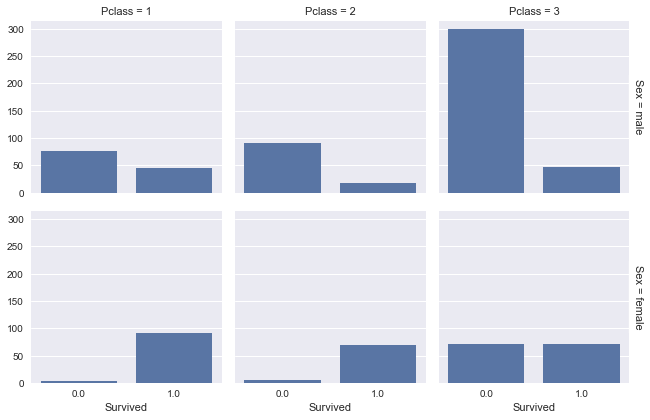

In [9]:
# In-sample correct
Base_correct = Correct_classified_df(Base_Model, X[Base], Y)
# Compare with what we wish
tem = [df_data, Base_correct]
tem_factor_df = []
for i in tem:
    tem_factor_df.append(pd.pivot_table( i, values='Survived',index='Sex_Code',columns='Pclass').round(3))
# display
display(pd.concat([tem_factor_df[0], tem_factor_df[1]],keys=['Data', 'Base'], axis = 1))
# visualization
g = sns.FacetGrid(data=df_data, row='Sex', col='Pclass',margin_titles=True)
g.map(sns.countplot,'Survived')

<a id='Sex-Pclass-table'></a>
## Sex-Pclass-table

The survival with respect to Sex & Pclass is shown above. We can see that our Pclass and Sex base model predict Pclass = 1 and Pclass = 2 all men died and all woman survived. The women in Pclass = 1 and Pclass = 2 all survived is basically true by checking the in-sample distribution. I think our model did well at the two parts. There are four parts remained that we are going to predict. **Suppose the in-sample distribution is a probably approximately correct target in both LB public and private, good features will bring us closer to it and improve both CV and LB.**

<a id='Adding Fare'></a>
# Adding Fare

* Another good feature which gives us "a richer person --> a higher social status --> more probability to survive".
We can check that easily by the pivot_table with Fare_median and the box plot with Log_Fare.

* A skew numerical feature which is harder to display and might not be good in the regression problem. We show the Log_Fare which also capture the relation with respect to Survived. Note that we adjust Fare --> Fare + 1 that makes all values could be presented.


Fare        
Survived    0.0     1.0
Pclass                 
1         44.75  77.958
2         13.00  21.000
3          8.05   8.517

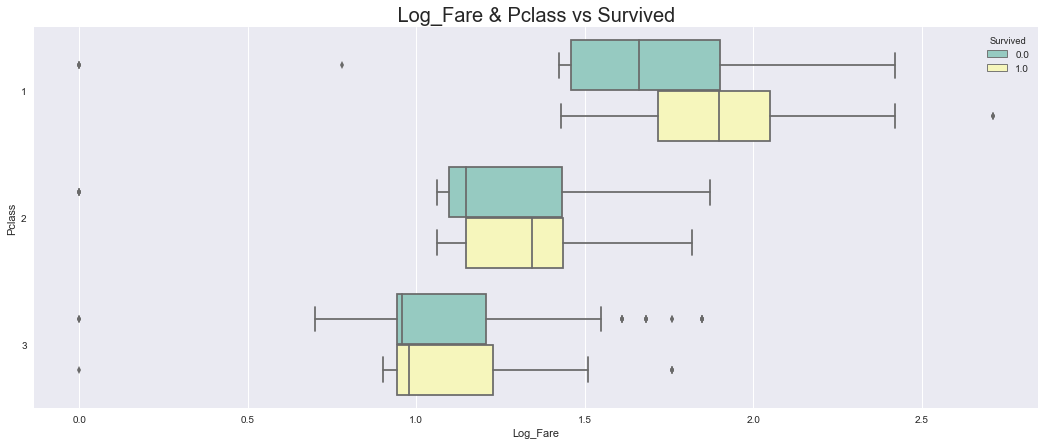

In [10]:
# there is some bugs in log-scale of boxplot. 
# alternatively, we transform x into log10(x) for visualization.
fig, ax = plt.subplots( figsize = (18,7) )
df_data['Log_Fare'] = (df_data['Fare']+1).map(lambda x : np.log10(x) if x > 0 else 0)
sns.boxplot(y='Pclass', x='Log_Fare',hue='Survived',data=df_data, orient='h'
                ,ax=ax,palette="Set3")
ax.set_title(' Log_Fare & Pclass vs Survived ',fontsize = 20)
pd.pivot_table(df_data,values = ['Fare'], index = ['Pclass'], columns= ['Survived'] ,aggfunc = 'median' ).round(3)

<a id='How many bins should we cut?'></a>
## How many bins should we cut?
We know that cutting the numerical feature into bins reduce noise. Let's image about that:
* If the bins --> infinity, then our bins are too delicate and back into numerical.
* If the bins --> one, then our bin is too rough to capture the pattern inside the feature.

Pclass,1,2,3
FareBin_Code_4,,,
0,8,6,323
1,0,128,193
2,77,104,147
3,238,39,46
Pclass,1,2,3
FareBin_Code_5,,,
0,8,6,261
1,0,36,218
2,0,124,132


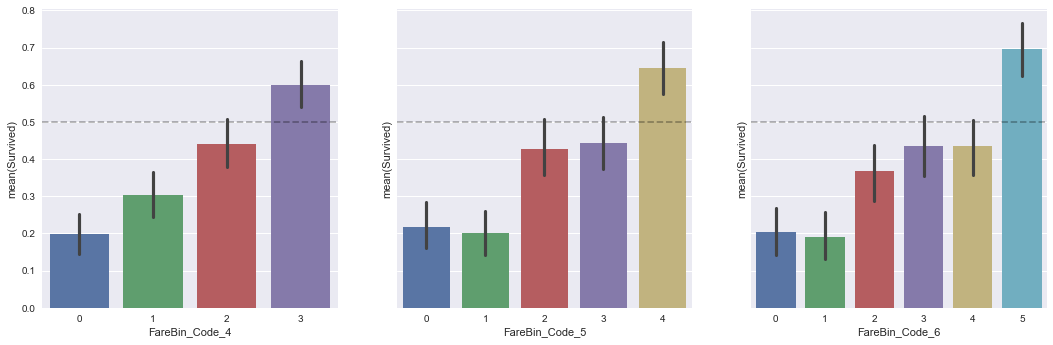

In [12]:
# Filling missing values
df_data['Fare'] = df_data['Fare'].fillna(df_data['Fare'].median())

# Making Bins
df_data['FareBin_4'] = pd.qcut(df_data['Fare'], 4)
df_data['FareBin_5'] = pd.qcut(df_data['Fare'], 5)
df_data['FareBin_6'] = pd.qcut(df_data['Fare'], 6)

label = LabelEncoder()
df_data['FareBin_Code_4'] = label.fit_transform(df_data['FareBin_4'])
df_data['FareBin_Code_5'] = label.fit_transform(df_data['FareBin_5'])
df_data['FareBin_Code_6'] = label.fit_transform(df_data['FareBin_6'])

# cross tab
df_4 = pd.crosstab(df_data['FareBin_Code_4'],df_data['Pclass'])
df_5 = pd.crosstab(df_data['FareBin_Code_5'],df_data['Pclass'])
df_6 = pd.crosstab(df_data['FareBin_Code_6'],df_data['Pclass'])

display_side_by_side(df_4,df_5,df_6)

# plots
fig, [ax1, ax2, ax3] = plt.subplots(1, 3,sharey=True)
fig.set_figwidth(18)
for axi in [ax1, ax2, ax3]:
    axi.axhline(0.5,linestyle='dashed', c='black',alpha = .3)
g1 = sns.factorplot(x='FareBin_Code_4', y="Survived", data=df_data,kind='bar',ax=ax1)
g2 = sns.factorplot(x='FareBin_Code_5', y="Survived", data=df_data,kind='bar',ax=ax2)
g3 = sns.factorplot(x='FareBin_Code_6', y="Survived", data=df_data,kind='bar',ax=ax3)
# close FacetGrid object
plt.close(g1.fig)
plt.close(g2.fig)
plt.close(g3.fig)

A wider range of bins to experiment should be done when you fork. If we cut bins = 3 ~ 8, the model performs better or not. Feel free when you encounter such a problem and you'll get a deep insight from yourself.


The dashed line indicated the coin toss gauss of the model when it doesn't capture any pattern. We use both RFECV and LB to check how many bins work well.

In [13]:
# splits again beacuse we just engineered new feature
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]
# Training set and labels
X = df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y = df_train['Survived']
# show columns
X.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Ticket', 'Sex_Code', 'Log_Fare', 'FareBin_4', 'FareBin_5',
       'FareBin_6', 'FareBin_Code_4', 'FareBin_Code_5', 'FareBin_Code_6'],
      dtype='object')

<a id=' Modeling'></a>
## Modeling

<a id='First shot'></a>
### First shot 
We need to try once on LB with randomly pick one fare bin to make sure the selected feature works better than Sex + Pclass. Here we pick bins = 4

In [14]:
# oob : 0.8054 split = 20,30,40 oob : 0.79012 split = 50
bin_4 = ['Sex_Code','Pclass','FareBin_Code_4']
bin_4_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
bin_4_Model.fit(X[bin_4], Y)
print('bin_4 oob score :%.5f' %(bin_4_Model.oob_score_),'   LB_Public : 0.7790')

bin_4 oob score :0.80584    LB_Public : 0.7790


We got 0.7790 which is better than 0.7655. The Fare feature works. Now we improve our result by RFECV and LB to choose bins.

Note: 
* If you tune the min_sample_split = 5,10,15, the result is the same. Because we set 250 trees to regularized the overfitting trees boundary.
* If you tune the min_sample_split = 30,40,45, the result is the same. 
Because we set 250 trees by aggregating them to capture more pattern that one tree cannot achieve. 
* If you tune the min_sample_split = 50 up, then the model tends to underfit
that cannot capture the pattern although we aggregate them.

In [15]:
# submission if you want
'''# submits
X_Submit = df_test.drop(labels=['PassengerId'],axis=1)

bin_4_pred = bin_4_Model.predict(X_Submit[bin_4])

submit = pd.DataFrame({"PassengerId": df_test['PassengerId'],
                      "Survived":bin_4_pred.astype(int)})
submit.to_csv("../output/submit_bin_4.csv",index=False)''';

<a id='Compare bins using RFECV'></a>
### Compare bins using RFECV
The RFECV is a method of Feature Selection named Recursive Forward Elimination Cross-Validation which is adding one feature once to test on CV. If your feature brings too less pattern CV decrease. But when CV increase, probably means that the feature brings enough pattern or just fit the noise in it which is overfitting.
So, a double check on LB to make sure our result is significant.

Pros:
* Concluding the feature interaction with the target. i.e. male in Pclass = 1 will survive more than Pclass = 3. It is what chi-square or others single feature testing cannot achieve.

Cons:
* Obviously, it will take a long time to select feature which is bad if the dataset is large.
* Depends on cv score but such kind of small dataset, it still overfits if we tune the hyperparameters too much. So I set min_sample_splits = 20 to prevent it happened.


 More detail about RFECV in [doc](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html) and an application that  [3 Strategies Analyzing Age and Their Impact](https://www.kaggle.com/ylt0609/3-strategies-analyzing-age-and-their-impact)


In [16]:
compare = ['Sex_Code','Pclass','FareBin_Code_4','FareBin_Code_5','FareBin_Code_6']
selector = RFECV(RandomForestClassifier(n_estimators=250,min_samples_split=20),cv=10,n_jobs=-1)
selector.fit(X[compare], Y)
print(selector.support_)
print(selector.ranking_)
print(selector.grid_scores_*100)

[ True  True  True  True  True]
[1 1 1 1 1]
[ 78.66981614  77.33398593  79.46010668  79.35657133  80.36780729]


It looks like that FareBin=6 captures more pattern, let's evaluate on different model random state and CV random state to make sure the result is not occasional.

In [17]:
score_b4,score_b5, score_b6 = [], [], []
seeds = 7 # kaggle kernel is unstable if you use too much computational resource
# I set seed = 10 normally when coding with my jupyter-notebook
for i in range(seeds):
    diff_cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=i)
    selector = RFECV(RandomForestClassifier(random_state=i,n_estimators=250,min_samples_split=20),cv=diff_cv,n_jobs=-1)
    selector.fit(X[compare], Y)
    score_b4.append(selector.grid_scores_[2])
    score_b5.append(selector.grid_scores_[3])
    score_b6.append(selector.grid_scores_[4])

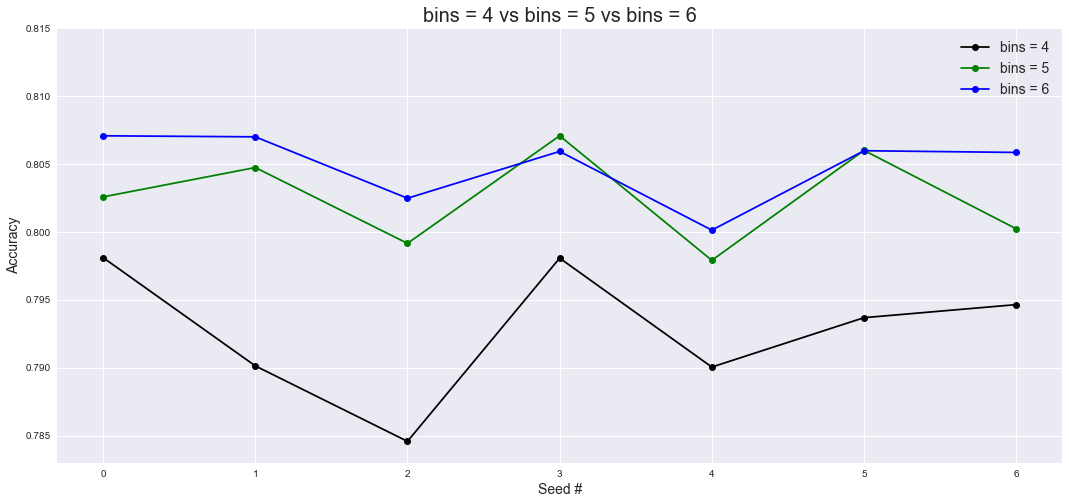

In [18]:
# to np.array
score_list = [score_b4, score_b5, score_b6]
for item in score_list:
    item = np.array(item*100)
# plot
fig = plt.figure(figsize= (18,8) )
ax = plt.gca()
ax.plot(range(seeds), score_b4,'-ok',label='bins = 4')
ax.plot(range(seeds), score_b5,'-og',label='bins = 5')
ax.plot(range(seeds), score_b6,'-ob',label='bins = 6')
ax.set_xlabel("Seed #", fontsize = '14')
ax.set_ylim(0.783,0.815)
ax.set_ylabel("Accuracy", fontsize = '14')
ax.set_title('bins = 4 vs bins = 5 vs bins = 6', fontsize='20')
plt.legend(fontsize = 14,loc='upper right')

It seems that bins = 6 capture more information with higher accuracy. Upon now we continue to test on LB to make sure there is no overfitting.

In [19]:
b4, b5, b6 = ['Sex_Code', 'Pclass','FareBin_Code_4'], ['Sex_Code','Pclass','FareBin_Code_5'], ['Sex_Code','Pclass','FareBin_Code_6']
b4_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
b4_Model.fit(X[b4], Y)
b5_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
b5_Model.fit(X[b5], Y)
b6_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
b6_Model.fit(X[b6], Y)
print('b4 oob score :%.5f' %(b4_Model.oob_score_),'   LB_Public : 0.7790')
print('b5 oob score :%.5f '%(b5_Model.oob_score_),' LB_Public : 0.79425')
print('b6 oob score : %.5f' %(b6_Model.oob_score_), '  LB_Public : 0.77033')

b4 oob score :0.80584    LB_Public : 0.7790
b5 oob score :0.81033   LB_Public : 0.79425
b6 oob score : 0.80135   LB_Public : 0.77033


<a id='Checkpoint_Fare'></a>
### Checkpoint

**bins = 5 WIN!** Set bins=6 will bring more noise and make model predict worse on LB. Now we get 0.79425 on LB score.

You can play the hyperparameter min_sample_split here, too. I have not done it, and I believe the similar effect happens that we discussed prior section.

<a id='Model Evaluation_Fare'></a>
## Model Evaluation

In [21]:
# In-Sample correct
b5_correct = Correct_classified_df(b5_Model, X[b5], Y)
# Compare 
tem = [df_data, Base_correct, b5_correct]
tem_factor_df = []
for i in tem:
    tem_factor_df.append(pd.pivot_table( i, values='Survived',index='Sex_Code',columns='Pclass').round(3))
# display
display(pd.concat([ tem_factor_df[0], tem_factor_df[1], tem_factor_df[2] ],keys=['Data', 'Base','Adding_FareBin'], axis = 1))

Data               Base             Adding_FareBin           
Pclass        1      2      3    1    2      3              1    2     3
Sex_Code                                                                
0         0.369  0.157  0.135  0.0  0.0  0.000            0.0  0.0  0.00
1         0.968  0.921  0.500  1.0  1.0  0.633            1.0  1.0  0.57

Look the 3 tables, the FareBin=5 feature capture the female survival pattern in Pclass = 3. But how about the pattern in pclass = 1,2,3 male?** I think it does. But the Sex predictor is too strong to outstrip the impact of FareBin=5.**
A solution might help is reconstructing the training dataset which you could give it a try. 

In this section, we achieve more accuracy by adding the Fare feature which 
separates some women into dead in Pclass = 3.

<a id='Adding Connected_Survival'></a>
# Adding Connected_Survival
This feature was found out in [Blood is thicker than water & friendship forever](https://www.kaggle.com/shunjiangxu/blood-is-thicker-than-water-friendship-forever/code) by S.Xu. You can also find out in Pytanic by Heads and Tails which collected a series of EDA. It's awesome and valuable features. S.Xu explore that based on family_size and fare. We take another approach from the feature Ticket. The both are roughly the same to capture the pattern.

In [22]:
df_train['Ticket'].describe()
# count - unique != 0 which means there are duplicated

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [23]:
# Family_size
df_data['Family_size'] = df_data['SibSp'] + df_data['Parch'] + 1
# how about the fare values of deplicate tickets 
deplicate_ticket = []
for tk in df_data.Ticket.unique():
    tem = df_data.loc[df_data.Ticket == tk, 'Fare']
    #print(tem.count())
    if tem.count() > 1:
        #print(df_data.loc[df_data.Ticket == tk,['Name','Ticket','Fare']])
        deplicate_ticket.append(df_data.loc[df_data.Ticket == tk,['Name','Ticket','Fare','Cabin','Family_size','Survived']])
deplicate_ticket = pd.concat(deplicate_ticket)
deplicate_ticket.head(8)

,Name,Ticket,Fare,Cabin,Family_size,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,C85,2,1.0
234,"Cumings, Mr. John Bradley",PC 17599,71.2833,C85,2,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,C123,2,1.0
137,"Futrelle, Mr. Jacques Heath",113803,53.1000,C123,2,0.0
6,"McCarthy, Mr. Timothy J",17463,51.8625,E46,1,0.0
146,"Hilliard, Mr. Herbert Henry",17463,51.8625,E46,1,NaN
7,"Palsson, Master. Gosta Leonard",349909,21.0750,NaN,5,0.0
24,"Palsson, Miss. Torborg Danira",349909,21.0750,NaN,5,0.0


We check out the dataframe of deplicated_ticket by easily tune the # of df.head() and found out that people have duplicates always with the same Fare. Furthermore, they died or survived together.
Let's separate them into families and friends.

In [24]:
print('people keep the same ticket: %.0f '%len(deplicate_ticket))
print('friends: %.0f '%len(deplicate_ticket[deplicate_ticket.Family_size == 1]))
print('families: %.0f '%len(deplicate_ticket[deplicate_ticket.Family_size > 1]))
df_fri = deplicate_ticket.loc[(deplicate_ticket.Family_size == 1) & (deplicate_ticket.Survived.notnull())].head(7)
# add a title friends
df_fami = deplicate_ticket.loc[(deplicate_ticket.Family_size > 1) & (deplicate_ticket.Survived.notnull())].head(7)
# add a title families
display(df_fri,df_fami)

people keep the same ticket: 596 
friends: 127 
families: 469 


,Name,Ticket,Fare,Cabin,Family_size,Survived
6,"McCarthy, Mr. Timothy J",17463,51.8625,E46,1,0.0
20,"Fynney, Mr. Joseph J",239865,26.0000,NaN,1,0.0
791,"Gaskell, Mr. Alfred",239865,26.0000,NaN,1,0.0
195,"Lurette, Miss. Elise",PC 17569,146.5208,B80,1,1.0
681,"Hassab, Mr. Hammad",PC 17572,76.7292,D49,1,1.0
61,"Icard, Miss. Amelie",113572,80.0000,B28,1,1.0
829,"Stone, Mrs. George Nelson (Martha Evelyn)",113572,80.0000,B28,1,1.0


,Name,Ticket,Fare,Cabin,Family_size,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,C85,2,1.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,C123,2,1.0
137,"Futrelle, Mr. Jacques Heath",113803,53.1000,C123,2,0.0
7,"Palsson, Master. Gosta Leonard",349909,21.0750,NaN,5,0.0
24,"Palsson, Miss. Torborg Danira",349909,21.0750,NaN,5,0.0
374,"Palsson, Miss. Stina Viola",349909,21.0750,NaN,5,0.0
567,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",349909,21.0750,NaN,5,0.0


In [26]:
# the same ticket family or friends
df_data['Connected_Survival'] = 0.5 # default 
for _, df_grp in df_data.groupby('Ticket'):
    if (len(df_grp) > 1):
        for ind, row in df_grp.iterrows():
            smax = df_grp.drop(ind)['Survived'].max()
            smin = df_grp.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                df_data.loc[df_data['PassengerId'] == passID, 'Connected_Survival'] = 1
            elif (smin==0.0):
                df_data.loc[df_data['PassengerId'] == passID, 'Connected_Survival'] = 0
# prints
print('people keep the same ticket: %.0f '%len(deplicate_ticket))
print('friends: %.0f '%len(deplicate_ticket[deplicate_ticket.Family_size == 1]))
print('families: %.0f '%len(deplicate_ticket[deplicate_ticket.Family_size > 1]))
print("people have connected information : %.0f" %(df_data[df_data['Connected_Survival']!=0.5].shape[0]))
display(df_data.groupby('Connected_Survival')[['Survived']].mean().round(3))

people keep the same ticket: 596 
friends: 127 
families: 469 
people have connected information : 496


,Survived
Connected_Survival,
0.0,0.225
0.5,0.298
1.0,0.728


There are 496 people have connected_survival information. And a pivot_table of Connected_Survival shows this is a useful feature.

<a id='Modeling Connected_Survival'></a>
## Modeling

In [27]:
# splits again beacuse we just engineered new feature
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]
# Training set and labels
X = df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y = df_train['Survived']

In [28]:
connect = ['Sex_Code','Pclass','FareBin_Code_5','Connected_Survival']
connect_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
connect_Model.fit(X[connect], Y)
print('connect oob score :%.5f' %(connect_Model.oob_score_),'   LB_Public : 0.80832')

connect oob score :0.82043    LB_Public : 0.80832


<a id='Checkpoint Connected_Survival'></a>
### Checkpoint
When we add Connect_Survival, we achieve 0.80832 on LB and 0.82043 oob.
It's quite a beneficial feature!

In [30]:
# submission if you want
'''# submits
X_Submit = df_test.drop(labels=['PassengerId'],axis=1)

connect_pred = connect_Model.predict(X_Submit[connect])

submit = pd.DataFrame({"PassengerId": df_test['PassengerId'],
                      "Survived":connect_pred.astype(int)})
submit.to_csv("submit_connect.csv",index=False)''';

<a id='Model Evaluation Connected_Survival'></a>
## Model Evaluation

In [31]:
# In-Sample correct
connect_correct = Correct_classified_df(connect_Model, X[connect], Y)
# Compare 
tem = [df_data, Base_correct, b5_correct,connect_correct]
tem_factor_df = []
for i in tem:
    tem_factor_df.append(pd.pivot_table( i, values='Survived',index='Sex_Code',columns='Pclass').round(3))
# display
keys=['Data', 'Base','Adding_FareBin','Adding_Connected']
display(pd.concat([ tem_factor_df[0], tem_factor_df[1], tem_factor_df[2],tem_factor_df[3] ],keys=keys, axis = 1))

Data               Base             Adding_FareBin             \
Pclass        1      2      3    1    2      3              1    2     3   
Sex_Code                                                                   
0         0.369  0.157  0.135  0.0  0.0  0.000            0.0  0.0  0.00   
1         0.968  0.921  0.500  1.0  1.0  0.633            1.0  1.0  0.57   

         Adding_Connected              
Pclass                  1    2      3  
Sex_Code                               
0                     0.0  0.0  0.027  
1                     1.0  1.0  0.510


In this section, we see that Connect_Survival separated more women dead with their families(friends) and some male survived in Pclass = 3. The male in Pclass = 3 survived might be adult or minor. If you want, just check the connect_correct dataframe then you found out what your model had done.

<a id='Adding Age'></a>
# Adding Age
We'll face a missing value problem that lost 20% data here. An analysis of Age feature and a better strategy was done in [3 Strategies Analyzing Age and Their Impact](https://www.kaggle.com/ylt0609/3-strategies-analyzing-age-and-their-impact).

My conclusion is:

The Age feature might be a useless feature but we could extract the minor.
The Minor survived more and probably interact well with the Connect_Survival feature. 

In [32]:
# extracted title using name
df_data['Title'] = df_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_data['Title'] = df_data['Title'].replace(['Capt', 'Col', 'Countess', 'Don',
                                               'Dr', 'Dona', 'Jonkheer', 
                                                'Major','Rev','Sir'],'Rare') 
df_data['Title'] = df_data['Title'].replace(['Mlle', 'Ms','Mme'],'Miss')
df_data['Title'] = df_data['Title'].replace(['Lady'],'Mrs')
df_data['Title'] = df_data['Title'].map({"Mr":0, "Rare" : 1, "Master" : 2,"Miss" : 3, "Mrs" : 4 })
Ti_pred = df_data.groupby('Title')['Age'].median().values
df_data['Ti_Age'] = df_data['Age']
# Filling the missing age
for i in range(0,5):
 # 0 1 2 3 4 5
    df_data.loc[(df_data.Age.isnull()) & (df_data.Title == i),'Ti_Age'] = Ti_pred[i]
df_data['Ti_Age'] = df_data['Ti_Age'].astype('int')

# extract minor
df_data['Age_copy'] = df_data['Age'].fillna(-1)
df_data['Minor'] = (df_data['Age_copy'] < 14.0) & (df_data['Age_copy']>= 0)
df_data['Minor'] = df_data['Minor'] * 1
# We could capture more 8 Master in Pclass = 3 by filling missing age 
df_data['Ti_Minor'] = ((df_data['Ti_Age']) < 14.0) * 1
print('The # of masters we found in missing Age by Title : ', (df_data['Ti_Minor'] - df_data['Minor']).sum())

The # of masters we found in missing Age by Title :  8


<a id='Modeling Adding Age'></a>
## Modeling

In [33]:
# splits again beacuse we just engineered new feature
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]
# Training set and labels
X = df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y = df_train['Survived']
# Show columns
X.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Ticket', 'Sex_Code', 'Log_Fare', 'FareBin_4', 'FareBin_5',
       'FareBin_6', 'FareBin_Code_4', 'FareBin_Code_5', 'FareBin_Code_6',
       'Family_size', 'Connected_Survival', 'Title', 'Ti_Age', 'Age_copy',
       'Minor', 'Ti_Minor'],
      dtype='object')

In [34]:
minor = ['Sex_Code','Pclass','FareBin_Code_5','Connected_Survival','Ti_Minor']
minor_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
minor_Model.fit(X[minor], Y)
print('Minor oob score :%.5f' %(minor_Model.oob_score_),'   LB_Public : 0.82296')

Minor oob score :0.84400    LB_Public : 0.82296


<a id='Checkpoint Adding Age'></a>
### Checkpoint
Now we get 0.82296 by adding Ti_Minor feature. I think the children survived more and there is an awesome interaction between Ti_Minor and Connect_Survival.

In [35]:
X_Submit = df_test.drop(labels=['PassengerId'],axis=1)

minor_pred = minor_Model.predict(X_Submit[minor])

submit = pd.DataFrame({"PassengerId": df_test['PassengerId'],
                      "Survived":minor_pred.astype(int)})
submit.to_csv("submit_minor.csv",index=False)

<a id='Model Evaluation Adding Age'></a>
## Model Evaluation

In [36]:
# In-Sample correct
minor_correct = Correct_classified_df(minor_Model, X[minor], Y)
# Compare 
tem = [df_data, Base_correct, b5_correct,connect_correct,minor_correct]
tem_factor_df = []
for i in tem:
    tem_factor_df.append(pd.pivot_table( i, values='Survived',index='Sex_Code',columns='Pclass').round(3))
# display
keys=['Data', 'Base','Adding_FareBin','Adding_Connected','Adding_Ti_Minor']
display(pd.concat([ tem_factor_df[0], tem_factor_df[1], tem_factor_df[2],tem_factor_df[3],tem_factor_df[4] ],keys=keys, axis = 1))

Data               Base             Adding_FareBin             \
Pclass        1      2      3    1    2      3              1    2     3   
Sex_Code                                                                   
0         0.369  0.157  0.135  0.0  0.0  0.000            0.0  0.0  0.00   
1         0.968  0.921  0.500  1.0  1.0  0.633            1.0  1.0  0.57   

         Adding_Connected             Adding_Ti_Minor                
Pclass                  1    2      3               1      2      3  
Sex_Code                                                             
0                     0.0  0.0  0.027           0.038  0.071  0.036  
1                     1.0  1.0  0.510           1.000  1.000  0.495

We can see that minor male are well separated by Ti_Minor  and Connected_Survival. Also, the female in Pclass = 3 might be fully separated(more accuracy probably overfit)

<a id='Conclusion'></a>
# Conclusion
This kernel introduced more detail in how RandomForest works and the Pclass-Sex table to make sure the effect you trained your model. I think that we did well on the female prediction using these features in this kernel. If you dig deeper in Connected_Survival, you will get ~0.84  as shown in[Titantic Mega Model - [0.84210]](https://www.kaggle.com/cdeotte/titantic-mega-model-0-84210) by Chris Deotte. How am awesome work he had done!

But above 0.85, I think it's critical to capture how the adult survived in Pclass = 1,2,3. Is there a pattern exist or not? Or try to figure out what model predict adult survived better than RandomForest with the same feature. I tried some, the tree-based model basically performed similar which just make a more robust predictor on predicting female and children. I found out that LogReg seems to do well on male in Pclass=1 but probably overfit. However, It's a valuable direction to explore.

Third, I filtered several common features by checking the LB score by myself. 
A noisy feature adds in, the more robust model is needed.
I think the feature in this kernel makes several models work well.


Finally, If you get something in this kernel or getting help in this kernel. Please upvote and let me know. Happy Coding!
